In [1]:
from PIL import Image, ImageDraw, ImageFont
from matplotlib import pyplot as plt
from matplotlib import image
import numpy as np
from numpy import asarray
import os
import cv2
# import scipy.optimize as opt

In [12]:
%matplotlib inline

In [2]:
def convert_RGB(image):
    im_RGB = image.convert("RGB")
    return im_RGB

In [3]:
def resize(image):
    im_resize = image.resize((80,80), Image.ANTIALIAS)
    return im_resize

In [4]:
def process_image(path):
    for item in os.listdir(path):
        if os.path.isfile(path + item):
            im = Image.open(path + item)
            if im.mode != 'RGB':
                im = convert_RGB(im)
            else:
                print("File already RGB")
            im = resize(im)
            im.save(str(path+item), 'JPEG', quality=90)
            im.close()
        else:
            print("Path not found")                

In [5]:
def print_modeANDsize(path):
    for item in os.listdir(path):
        if os.path.isfile(path+item):
            im = Image.open(path + item)
            print(im.mode, im.size, im.format, "   ", item)

In [6]:
#process_image("CALIBRATION IMAGES/Yoda/")
#process_image("CALIBRATION IMAGES/DarthVader/")

In [7]:
print_modeANDsize("CALIBRATION IMAGES/DarthVader/")
print()
print('-----------------------------------------------------------------------------------------------------------')
print()
print_modeANDsize("CALIBRATION IMAGES/Yoda/")

RGB (80, 80) JPEG     download (1).jfif
RGB (80, 80) JPEG     download (10).jfif
RGB (80, 80) JPEG     download (11).jfif
RGB (80, 80) JPEG     download (12).jfif
RGB (80, 80) JPEG     download (13).jfif
RGB (80, 80) JPEG     download (14).jfif
RGB (80, 80) JPEG     download (15).jfif
RGB (80, 80) JPEG     download (16).jfif
RGB (80, 80) JPEG     download (17).jfif
RGB (80, 80) JPEG     download (18).jfif
RGB (80, 80) JPEG     download (19).jfif
RGB (80, 80) JPEG     download (2).jfif
RGB (80, 80) JPEG     download (20).jfif
RGB (80, 80) JPEG     download (22).jfif
RGB (80, 80) JPEG     download (23).jfif
RGB (80, 80) JPEG     download (24).jfif
RGB (80, 80) JPEG     download (25).jfif
RGB (80, 80) JPEG     download (26).jfif
RGB (80, 80) JPEG     download (27).jfif
RGB (80, 80) JPEG     download (28).jfif
RGB (80, 80) JPEG     download (29).jfif
RGB (80, 80) JPEG     download (3).jfif
RGB (80, 80) JPEG     download (30).jfif
RGB (80, 80) JPEG     download (4).jfif
RGB (80, 80) JPEG   

RGB (80, 80) JPEG     images (70).jfif
RGB (80, 80) JPEG     images (70)1.jfif
RGB (80, 80) JPEG     images (71).jfif
RGB (80, 80) JPEG     images (71)1.jfif
RGB (80, 80) JPEG     images (72).jfif
RGB (80, 80) JPEG     images (72)1.jfif
RGB (80, 80) JPEG     images (73).jfif
RGB (80, 80) JPEG     images (73)1.jfif
RGB (80, 80) JPEG     images (74).jfif
RGB (80, 80) JPEG     images (74)1.jfif
RGB (80, 80) JPEG     images (75).jfif
RGB (80, 80) JPEG     images (75)1.jfif
RGB (80, 80) JPEG     images (76).jfif
RGB (80, 80) JPEG     images (76)1.jfif
RGB (80, 80) JPEG     images (77).jfif
RGB (80, 80) JPEG     images (77)1.jfif
RGB (80, 80) JPEG     images (78).jfif
RGB (80, 80) JPEG     images (78)1.jfif
RGB (80, 80) JPEG     images (79).jfif
RGB (80, 80) JPEG     images (79)1.jfif
RGB (80, 80) JPEG     images (8).jfif
RGB (80, 80) JPEG     images (80).jfif
RGB (80, 80) JPEG     images (81).jfif
RGB (80, 80) JPEG     images (81)1.jfif
RGB (80, 80) JPEG     images (82).jfif
RGB (80, 80) JP

In [ ]:
# Creating Data

In [16]:
img = cv2.imread("CALIBRATION IMAGES/Yoda/images - 2020-02-17T194233.532.jfif")

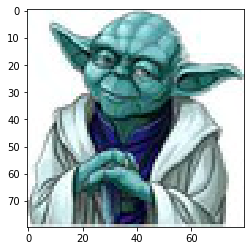

In [17]:
plt.imshow(img)
plt.show()

In [18]:
img.shape

(80, 80, 3)

In [70]:
def create_data(path):
    data = []
    for item in os.listdir(path):
        if os.path.isfile(path + item):
            img = cv2.imread(path + item)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            data.append(img)
    return data

In [71]:
darth_data = create_data("CALIBRATION IMAGES/DarthVader/")
yoda_data = create_data("CALIBRATION IMAGES/Yoda/")

In [72]:
print(len(darth_data))
print(len(yoda_data))

266
265


In [73]:
data = np.array(darth_data+yoda_data)

In [74]:
data.shape

(531, 80, 80, 3)

In [75]:
data[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [76]:
# Data Visualization

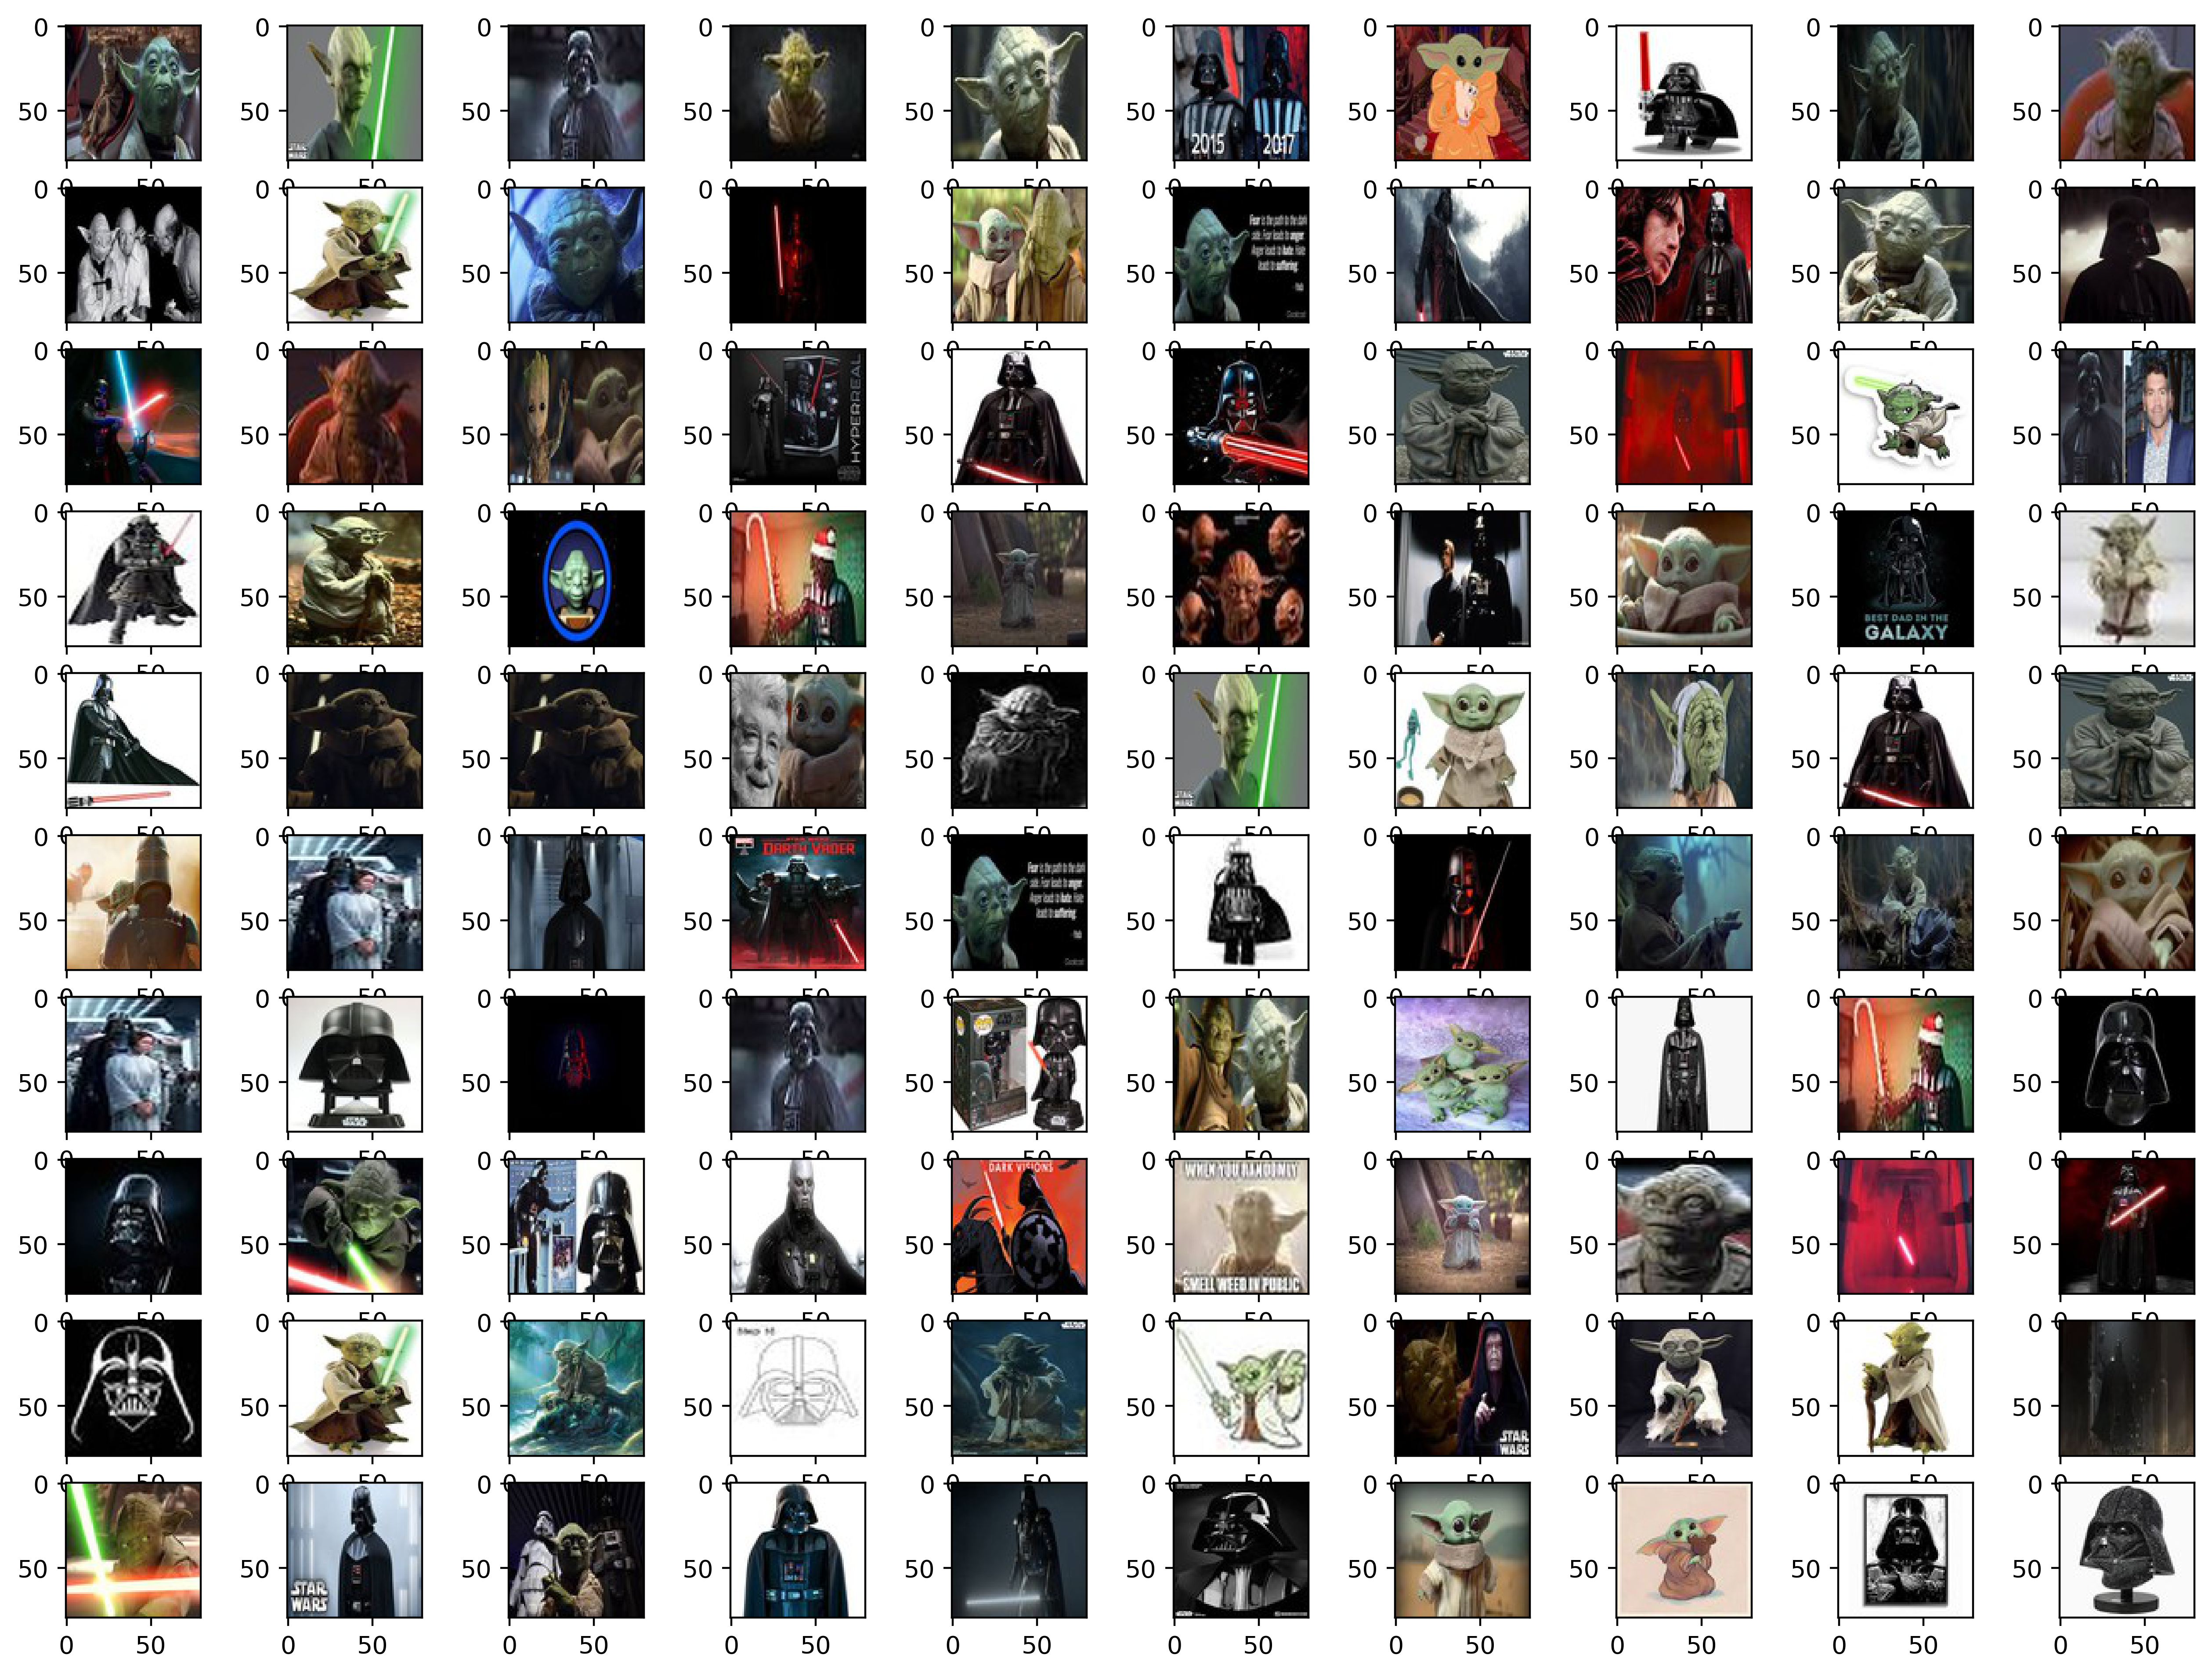

In [77]:
fig, ax = plt.subplots(10,10, figsize=(16, 12), dpi= 400, facecolor='w', edgecolor='k')
for row in range(10):
    for col in range(10):
        ax[row][col].imshow(data[np.random.randint(0, len(data)-1)])